In [8]:
import math
from decimal import Decimal
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Create vectors and try all of the similarity distances

In [3]:
class Similarity():
    """Five similarity measure function"""
    def euclidean_distance(self, x, y):
        """x, y: lists"""
        return np.linalg.norm(np.subtract(x, y))
    
    def manhattan_distance(self, x, y):
        return np.sum(np.abs(np.subtract(x, y)))

    def minkowsi_distance(self, x, y, p_value):
        return math.pow(np.sum(np.power(np.abs(np.subtract(x, y)), p_value)), 1/p_value)
    
    def cosine_distance(self, x, y):
        return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    
    def jaccard_similarity(self, x, y):
        inter = len(np.intersect1d(x, y))
        union = len(np.union1d(x, y))
        return float(inter) / union

In [60]:
x = np.asarray((1, 2, 3, 4, 5))
y = np.asarray((1, 10, 40, 4, 850))

sim = Similarity()
print(sim.euclidean_distance(x, y))
print(sim.manhattan_distance(x, y))
print(sim.minkowsi_distance(x, y, 2))
print(sim.cosine_distance(x, y))
print(sim.jaccard_similarity(x, y))

845.8475039863864
890
845.8475039863864
0.6982763742903852
0.25


# Create random 1000 points under defined stds and using PCA to find eigen vectors and values. Draw these vectors 

In [95]:
mu, sigma = [0, 0], [5, 5] 
X = np.random.normal(mu, sigma, (1000, 2))
X.shape

(1000, 2)

Eigenvectors:  [-0.88752517 -0.46075923]
Eigenvalues:  24.777887675271426
Eigenvectors:  [-0.46075923  0.88752517]
Eigenvalues:  23.81819810978738


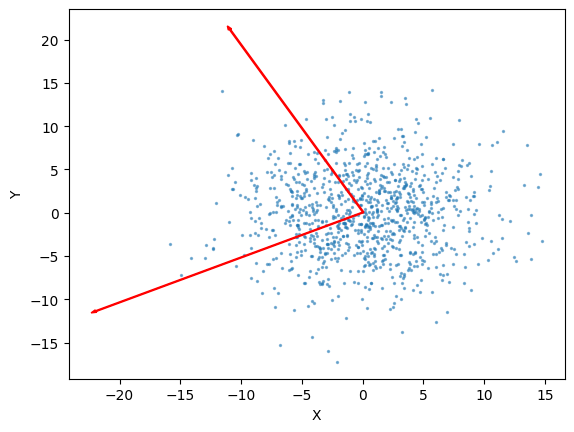

In [96]:
pca = PCA()

X_transformed = pca.fit_transform(X)

X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / X.shape[0]

eigenvalues = pca.explained_variance_

for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print("Eigenvectors: ", eigenvector)
    print("Eigenvalues: ", eigenvalue)
    
plt.scatter(X[:,0], X[:,1], s=2, alpha=0.5)

for i in range(len(pca.components_)):
    plt.arrow(pca.mean_[0], pca.mean_[1], pca.components_[i,0]*pca.explained_variance_[i],
              pca.components_[i,1]*pca.explained_variance_[i], color='red', width=0.1)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()